In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.optimize import minimize, bisect

In [3]:
from dcpyps.ekdist import ekrecord
from dcpyps.ekdist import ekplot
from dcpyps import dcequations as dceq

In [4]:
rec = ekrecord.SingleChannelRecord()

In [5]:
infile = ["/DCPYPS/dcpyps/tests/AChsim.scn"]
rec.load_SCN_file(infile)

In [6]:
print(rec)

Intervals loaded from SCN file: /DCPYPS/dcpyps/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 0.0 microseconds
Number of resolved intervals = 13947
Number of time periods = 13947

Number of open periods = 6974
Mean and SD of open periods = 0.428573114 +/- 0.639318244 ms
Range of open periods from 0.010021283 ms to 7.095655892 ms

Number of shut intervals = 6973
Mean and SD of shut periods = 1101.849436760 +/- 1566.386461258 ms
Range of shut periods from 0.010006604 ms to 14774.831771851 ms


In [7]:
rec.tres = 20e-6
print(rec)

Intervals loaded from SCN file: /DCPYPS/dcpyps/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 100.0 microseconds
Number of resolved intervals = 6589
Number of time periods = 4681

Number of open periods = 2341
Mean and SD of open periods = 0.831218670 +/- 20.791480723 ms
Range of open periods from -1000.000000000 ms to 15.834579885 ms

Number of shut intervals = 2340
Mean and SD of shut periods = 3282.938480377 +/- 3341.832637787 ms
Range of shut periods from 0.100321035 ms to 25729.509353638 ms


RED- Open periods
GREEN- Shut intervals
BLUE- Popen


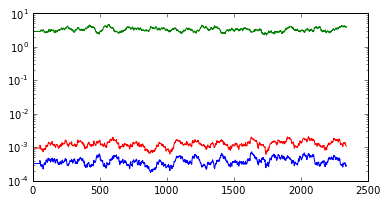

In [8]:
ekplot.plot_stability_intervals(rec)

Average open amplitude =  5.85001570513


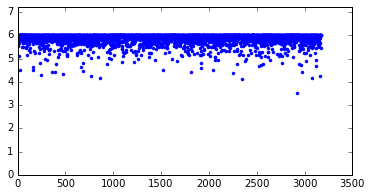

In [9]:
fc = 3000 # 3 kHz
ekplot.plot_stability_amplitudes(rec, fc, n=2)

Range of amplitudes: 3.516 - 6.000


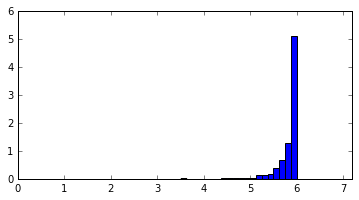

In [10]:
ekplot.plot_fitted_amplitude_histogram(rec, fc, n=2)

Mean and SD of 2341 open periods = 0.831219 +/- 20.7915 ms
	Range from -1000 to 15.8346 ms


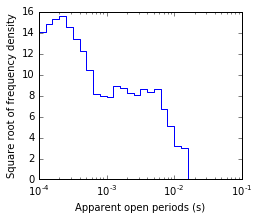

In [11]:
ekplot.plot_xlog_interval_histogram(rec.opint, rec.tres, shut=False)

Mean and SD of 2340 open periods = 3282.94 +/- 3341.83 ms
	Range from 0.100321 to 25729.5 ms


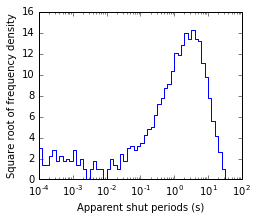

In [12]:
ekplot.plot_xlog_interval_histogram(rec.shint, rec.tres, shut=True)

## Fit multi-exponential pdf

##### Fit open period histogram

In [13]:
taus = [0.002]
areas = [1]
expPDF = dceq.MultiExponentialPDF(np.asarray(rec.opint), 
                                         taus=np.asarray(taus), areas=np.asarray(areas))
theta = expPDF.theta
print('Start LogLikelihood =', expPDF.loglik(theta))

Start LogLikelihood = 1156924.543894464


In [14]:
res = minimize(expPDF.loglik, theta, method='Nelder-Mead')
print(res)
expPDF.theta = res.x

 final_simplex: (array([[ 53364968.58870024],
       [ 53364968.58880024]]), array([ 36.77833044,  36.77833044]))
           fun: 36.778330435394309
       message: 'Optimization terminated successfully.'
          nfev: 183
           nit: 83
        status: 0
       success: True
             x: array([ 53364968.58870024])


Tau = 53364968.588700; lambda (1/s)= 0.000000
Area= 1.000000; number = 122980053917.083;amplitude (1/s) = 0.000

Overall mean = 53364968.588700
Predicted true number of events = 122980053917
Number of fitted = 2341
Number below Ylow = -2304.509; number above Yhigh = 122980053880.592



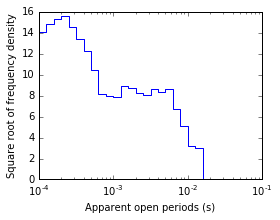

In [15]:
ekplot.plot_xlog_interval_histogram_fit(rec.opint, rec.tres, expPDF.to_plot, res.x, shut=False)
print(expPDF)